In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import defaultdict
import json
import gzip
from urllib.request import urlopen
from collections import defaultdict

# Read Data

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Movies_and_TV_5.json.gz

--2022-03-12 00:53:21--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Movies_and_TV_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791322468 (755M) [application/octet-stream]
Saving to: ‘Movies_and_TV_5.json.gz’

Movies_and_TV_5.jso 100%[===================>] 754.66M  73.4MB/s    in 11s     

2022-03-12 00:53:33 (65.9 MB/s) - ‘Movies_and_TV_5.json.gz’ saved [791322468/791322468]



In [ ]:
### load the meta data

data = []
with gzip.open('Movies_and_TV_5.json.gz') as f:
    for l in f:
        j = json.loads(l.strip())
        d = {}
        d['overall'] = j['overall']
        if 'reviewText' in j:
            d['reviewText'] = j['reviewText']
        else:
            d['reviewText'] = None
        if 'summary' in j:
            d['summary'] = j['summary']
        else:
            d['summary'] = None
        data.append(d)
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

3410019
{'overall': 5.0, 'reviewText': "So sorry I didn't purchase this years ago when it first came out!!  This is very good and entertaining!  We absolutely loved it and anticipate seeing it repeatedly.  We actually wore out the cassette years back, so we also purchased this same product on cd.  Best purchase we made out of all!  Would purchase on dvd if we could find one.", 'summary': 'Amazing!'}


# Clean Data

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# Drop data with no review text
df = df[~df.reviewText.isnull()].copy()

In [ ]:
# Create dataframes for each star rating
df_1 = df[df['overall'] == 1]
print('num 1-star reviews: ', len(df_1))

df_2 = df[df['overall'] == 2]
print('num 2-star reviews: ', len(df_2))

df_3 = df[df['overall'] == 3]
print('num 3-star reviews: ', len(df_3))

df_4 = df[df['overall'] == 4]
print('num 4-star reviews: ', len(df_4))

df_5 = df[df['overall'] == 5]
print('num 5-star reviews: ', len(df_5))

num 1-star reviews:  193110
num 2-star reviews:  172409
num 3-star reviews:  349641
num 4-star reviews:  665734
num 5-star reviews:  2027544


In [ ]:
import scipy as sp
import seaborn as sns
#MLE
print("The resulting theta will be the one that maximizes the likelihood function -> theta = sum(x_i)/N")

#1star
n1 = len(df_1)
theta = len(df_1)/len(df)
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=len(df))
resulting_theta1 = sum(X_arr)/len(df)

print("The resulting theta will be the one that maximizes the likelihood function for 1 star -> theta =" + str(resulting_theta1))

#2star
n2 = len(df_2)
theta = len(df_2)/len(df)
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=len(df))
resulting_theta2 = sum(X_arr)/len(df)

print("The resulting theta will be the one that maximizes the likelihood function for 2 stars -> theta =" + str(resulting_theta2))


#3star
n3 = len(df_3)
theta = len(df_3)/len(df)
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=len(df))
resulting_theta3 = sum(X_arr)/len(df)

print("The resulting theta will be the one that maximizes the likelihood function for 3 stars -> theta =" + str(resulting_theta3))

#4star
n4 = len(df_4)
theta = len(df_4)/len(df)
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=len(df))
resulting_theta4 = sum(X_arr)/len(df)

print("The resulting theta will be the one that maximizes the likelihood function for 4 stars -> theta =" + str(resulting_theta4))


#5star
n5 = len(df_5)
theta = len(df_5)/len(df)
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=len(df))
resulting_theta5 = sum(X_arr)/len(df)

print("The resulting theta will be the one that maximizes the likelihood function for 5 stars -> theta =" + str(resulting_theta5))


The resulting theta will be the one that maximizes the likelihood function -> theta = sum(x_i)/N
The resulting theta will be the one that maximizes the likelihood function for 1 star -> theta =0.056615963089250855
The resulting theta will be the one that maximizes the likelihood function for 2 stars -> theta =0.0505014320342632
The resulting theta will be the one that maximizes the likelihood function for 3 stars -> theta =0.10277024255685449
The resulting theta will be the one that maximizes the likelihood function for 4 stars -> theta =0.19547605090660297
The resulting theta will be the one that maximizes the likelihood function for 5 stars -> theta =0.5946682908710677


0.0524
0.0481
0.1015
0.1897
0.5813


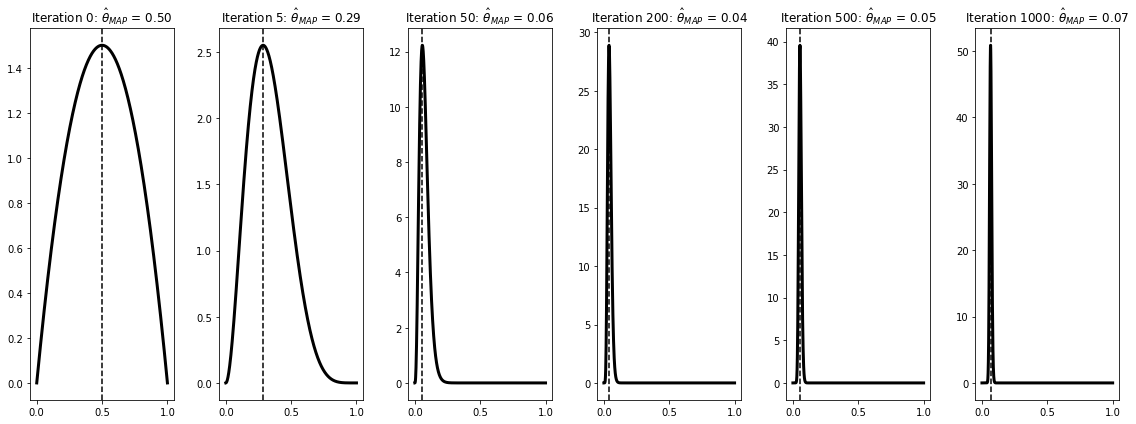

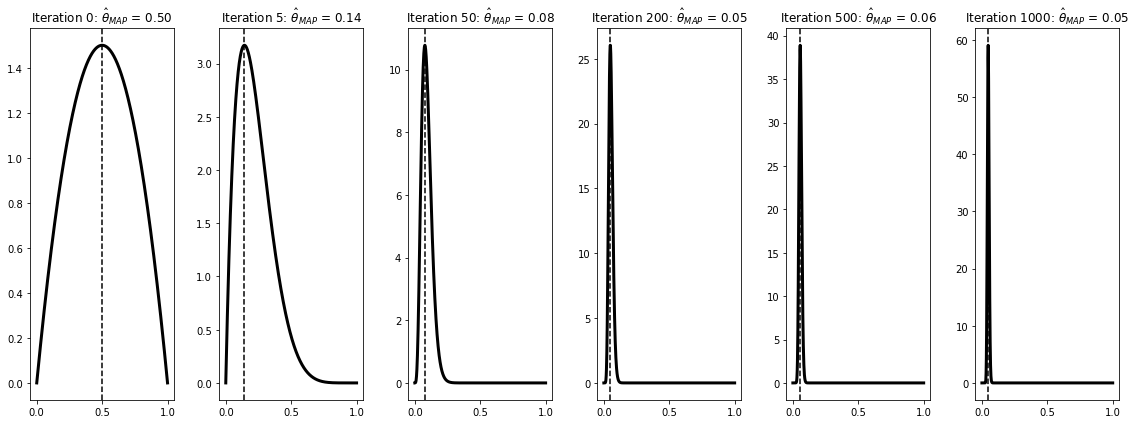

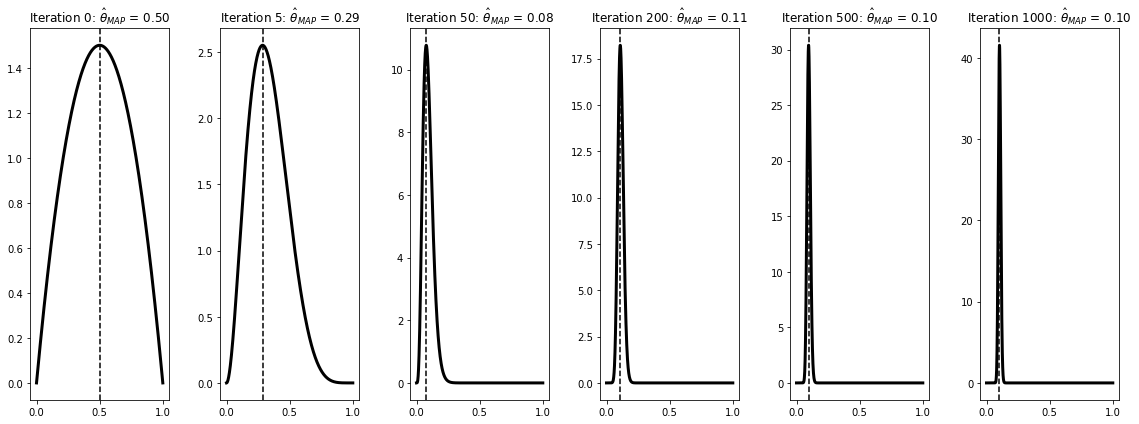

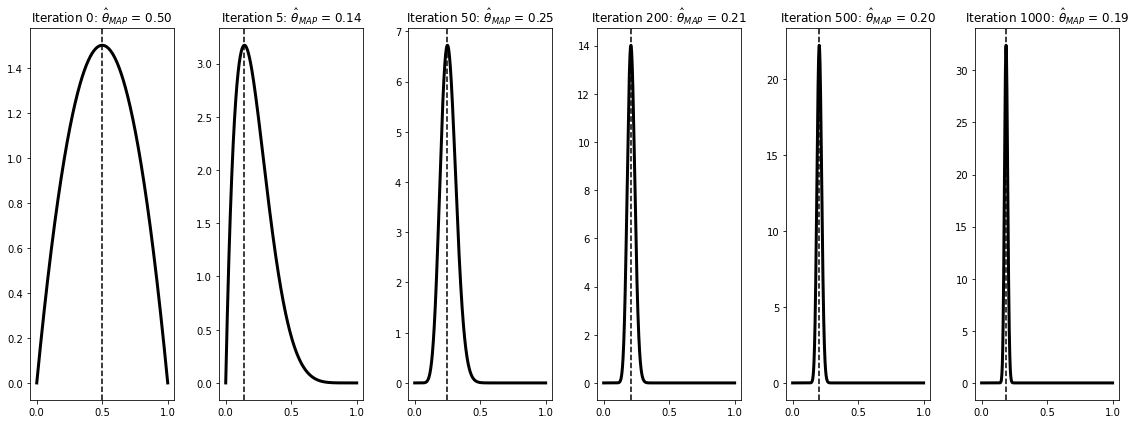

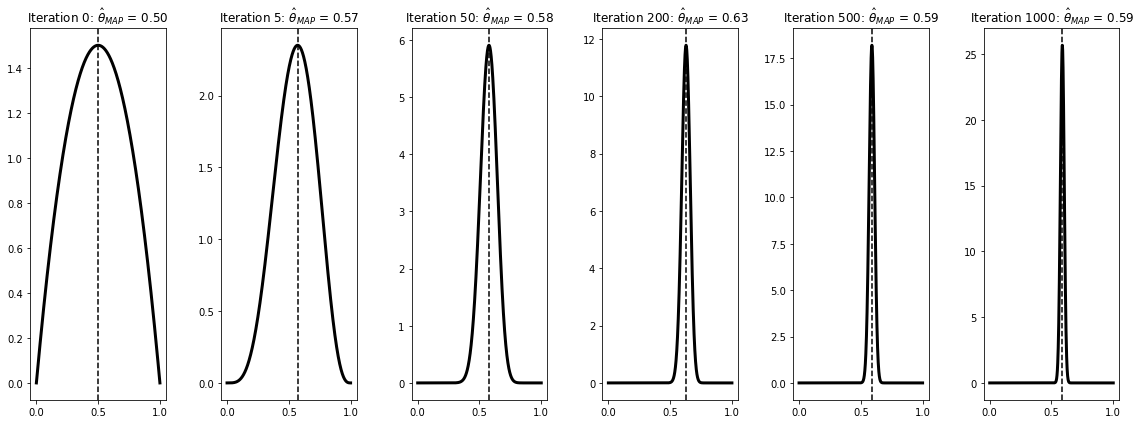

In [ ]:
#MAP
n = 10000
X_arr = np.ones(n)
alpha = 2
beta = 2

#1 star
theta = len(df_1)/len(df)
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=n)
print(sum(X_arr) / n)

new_beta = np.asarray([[alpha + sum(X_arr[:i+1]), beta+(i+1-sum(X_arr[:i+1]))] for i in range(n)])
new_beta = np.insert(new_beta, 0, [alpha, beta], 0)
beta_X = np.linspace(0, 1, 1000)
my_color = 'black'
fig, ax_arr = plt.subplots(ncols=6, figsize=(16,6), sharex=True)
for i, iter_ in enumerate([0, 5, 50, 200, 500, 1000]):
    ax = ax_arr[i]
    a, b = new_beta[iter_]
    beta_Y = sp.stats.beta.pdf(x=beta_X, a=a, b=b)
    ax.plot(beta_X, beta_Y, color=my_color, linewidth=3)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(iter_, mode))
fig.tight_layout()

#2 star
theta = len(df_2)/len(df)
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=n)
print(sum(X_arr) / n)

new_beta = np.asarray([[alpha + sum(X_arr[:i+1]), beta+(i+1-sum(X_arr[:i+1]))] for i in range(n)])
new_beta = np.insert(new_beta, 0, [alpha, beta], 0)
beta_X = np.linspace(0, 1, 1000)
my_color = 'black'
fig, ax_arr = plt.subplots(ncols=6, figsize=(16,6), sharex=True)
for i, iter_ in enumerate([0, 5, 50, 200, 500, 1000]):
    ax = ax_arr[i]
    a, b = new_beta[iter_]
    beta_Y = sp.stats.beta.pdf(x=beta_X, a=a, b=b)
    ax.plot(beta_X, beta_Y, color=my_color, linewidth=3)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(iter_, mode))
fig.tight_layout()

#3 star
theta = len(df_3)/len(df)
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=n)
print(sum(X_arr) / n)

new_beta = np.asarray([[alpha + sum(X_arr[:i+1]), beta+(i+1-sum(X_arr[:i+1]))] for i in range(n)])
new_beta = np.insert(new_beta, 0, [alpha, beta], 0)
beta_X = np.linspace(0, 1, 1000)
my_color = 'black'
fig, ax_arr = plt.subplots(ncols=6, figsize=(16,6), sharex=True)
for i, iter_ in enumerate([0, 5, 50, 200, 500, 1000]):
    ax = ax_arr[i]
    a, b = new_beta[iter_]
    beta_Y = sp.stats.beta.pdf(x=beta_X, a=a, b=b)
    ax.plot(beta_X, beta_Y, color=my_color, linewidth=3)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(iter_, mode))
fig.tight_layout()

#4 star
theta = len(df_4)/len(df)
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=n)
print(sum(X_arr) / n)

new_beta = np.asarray([[alpha + sum(X_arr[:i+1]), beta+(i+1-sum(X_arr[:i+1]))] for i in range(n)])
new_beta = np.insert(new_beta, 0, [alpha, beta], 0)
beta_X = np.linspace(0, 1, 1000)
my_color = 'black'
fig, ax_arr = plt.subplots(ncols=6, figsize=(16,6), sharex=True)
for i, iter_ in enumerate([0, 5, 50, 200, 500, 1000]):
    ax = ax_arr[i]
    a, b = new_beta[iter_]
    beta_Y = sp.stats.beta.pdf(x=beta_X, a=a, b=b)
    ax.plot(beta_X, beta_Y, color=my_color, linewidth=3)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(iter_, mode))
fig.tight_layout()

#5 star
theta = len(df_5)/len(df)
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=n)
print(sum(X_arr) / n)

new_beta = np.asarray([[alpha + sum(X_arr[:i+1]), beta+(i+1-sum(X_arr[:i+1]))] for i in range(n)])
new_beta = np.insert(new_beta, 0, [alpha, beta], 0)
beta_X = np.linspace(0, 1, 1000)
my_color = 'black'
fig, ax_arr = plt.subplots(ncols=6, figsize=(16,6), sharex=True)
for i, iter_ in enumerate([0, 5, 50, 200, 500, 1000]):
    ax = ax_arr[i]
    a, b = new_beta[iter_]
    beta_Y = sp.stats.beta.pdf(x=beta_X, a=a, b=b)
    ax.plot(beta_X, beta_Y, color=my_color, linewidth=3)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(iter_, mode))
fig.tight_layout()

In [ ]:
import random
random.seed(42069)

# Randomly sample n_train (100k) datapoints from each rating to form training data
n_train = 100000
data_1 = df_1.to_dict('records')
data_2 = df_2.to_dict('records')
data_3 = df_3.to_dict('records')
data_4 = df_4.to_dict('records')
data_5 = df_5.to_dict('records')

train = random.sample(data_1, n_train) + random.sample(data_2, n_train) + random.sample(data_3, n_train) + random.sample(data_4, n_train) + random.sample(data_5, n_train)
random.shuffle(train)
len(train)

500000

In [ ]:
import string

# Using NLTK Library
import nltk
# import the stopwords collection from the nltkcorpus module
from nltk.corpus import stopwords
nltk.download('stopwords')
sWords = set(stopwords.words())


# New bag-of-words after removing punctuation capitalization and stopwords
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
ascii_lower = set(string.ascii_lowercase)
whitespace = set(string.whitespace)

for d in train:
    r = ''.join([c for c in d['reviewText'].lower() if not c in punctuation and (c in ascii_lower or c in whitespace)])
    for w in r.split():
        if not w in sWords:
            wordCount[w] += 1

print('num words case-insensitive and no punc: ', len(wordCount))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
num words case-insensitive and no punc:  407782


In [ ]:
# Sort by popularity 
counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()
words = [x[1] for x in counts[2:750]]

print('top 20 popular words: ')
for i in range(20):
    print(words[i], wordCount[words[i]])

print('top 20 least popular words: ')
for i in reversed(range(1, 20)):
    print(words[-i], wordCount[words[-i]])

words = set(words)

top 20 popular words: 
like 177915
good 176169
story 115759
would 114727
great 112150
time 105217
really 104703
much 95481
even 92317
get 88493
see 84373
first 83358
well 83019
movies 77819
dont 77125
watch 74726
bad 70924
love 67341
dvd 65663
could 65145
top 20 least popular words: 
dumb 5743
bunch 5734
shots 5730
killing 5727
personal 5715
edition 5690
potential 5677
doctor 5639
thriller 5638
showing 5625
brilliant 5622
solid 5613
leaves 5589
issues 5567
score 5563
acted 5560
musical 5559
mention 5557
worked 5546


# Feature Extraction

In [ ]:
wordId = dict(zip(words, range(len(words))))

def feature(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['reviewText'].lower() if not c in punctuation and (c in ascii_lower or c in whitespace) ])
    for w in r.split():
        if w in words:
            feat[wordId[w]] += 1
    return feat

In [ ]:
# Get smaller training sample
small_train = random.sample(train, int(len(train)/2))

In [ ]:
X = [feature(d) for d in small_train]
train_set = np.asarray(X)
train_set.shape

(250000, 748)

# K-Means Algorithm

In [ ]:
def calcSqDistances(X, Kmus):
    N,D = X.shape
    K = Kmus.shape[0]
    sqDist = np.zeros((N, K), dtype=np.float32)
    
    for i in range(N):
        for j in range(K):
            sqDist[i,j] = np.linalg.norm(X[i] - Kmus[j])
    return sqDist

In [ ]:
def determineRnk(sqDmat):
    m = np.argmin(sqDmat, axis=1)
    return np.eye(sqDmat.shape[1])[m]

In [ ]:
def recalcMus(X, Rnk):
#     N, D = X.shape
#     Kmus = np.zeros((len(Rnk[0]), D))
#     for k in range(len(Rnk[0])):
#         Rnk_new = np.stack([Rnk[:, k], Rnk[:, k]], axis=1)
#         Kmus[k,:] = np.sum(np.multiply(X, Rnk_new), axis=0) / np.sum(Rnk[:,k], axis=0)
#     return Kmus
    return (np.divide(X.T.dot(Rnk), np.sum(Rnk, axis=0))).T

In [ ]:
def runKMeans(K):
    X = train_set
    N, D = X.shape
    Kmus = np.zeros((K, D))
    rand_inds = np.random.permutation(N)
    Kmus = X[rand_inds[0:K],:]
    maxiters = 1000
    
    for iter in range(maxiters):
        sqDmat = calcSqDistances(X, Kmus)
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus
        Kmus = recalcMus(X, Rnk)
        if np.sum(np.abs(KmusOld.reshape((-1, 1)) - Kmus.reshape((-1, 1)))) < 1e-6:
            break
    return Kmus, Rnk

In [ ]:
kmus5, Rnk = runKMeans(5)

In [ ]:
kmus5

array([[0.08152832, 0.03834253, 0.22514463, ..., 0.08791874, 0.18458227,
        0.05953182],
       [0.00478015, 0.00590329, 0.03084578, ..., 0.00408564, 0.01022224,
        0.00978275],
       [0.15018022, 0.04365238, 0.4989988 , ..., 0.18662395, 0.3360032 ,
        0.15698839],
       [0.03231975, 0.02803816, 0.12084052, ..., 0.03204955, 0.07029285,
        0.03161308],
       [0.00454545, 0.04545455, 0.39545455, ..., 0.31818182, 0.33181818,
        0.01818182]])

In [ ]:
Rnk

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
def predict(feat, Kmus):
    sqDmat = calcSqDistances(feat, Kmus)
    Rnk = determineRnk(sqDmat)
    return Rnk

# Sanity Check and Results

5 Examples of Cluster 1 Reviews

In [ ]:
cluster_1_idx = []
for i in range(len(Rnk)):
    if np.where(Rnk[i] == 1)[0] == 0:
        cluster_1_idx.append(i)

rev1 = [small_train[i] for i in cluster_1_idx]
rev1[:5]

[{'overall': 3.0,
  'reviewText': "I saw this movie today, at 1:30 in the morning. And I was very excited.'Cause I love Jason and his Friday the 13th movies.\nI always liked them,and watched them since I was very little, I got scared like a baby with Jason(Of course that was many years ago.\nThe movie starts with a great slasher beginning. Rowan(Lexa Doig) and Jason(Kane Hodder) are in the same room and only one of them will survive...No. Rowan and Jason get both frozen in time when she suddenly tryes to scape from him(The year is 2010).\nAfter, like 400 years, this two frozen bodys are found by a goup of students. The take them to their ship and bring Rowan back to like with the new technology.\nBut she's not the only one that wakes up, Jason begins his large(Very large, I dare you to try to count them) body count, just after he gets up from bed.\nJason X is a real well done movie. It's visually amazing, the athmosphere it's creepy, and it's a real big step for the Friday the 13th mov

5 Examples of Cluster 2 Reviews

In [ ]:
cluster_2_idx = []
for i in range(len(Rnk)):
    if np.where(Rnk[i] == 1)[0] == 1:
        cluster_2_idx.append(i)

rev2 = [small_train[i] for i in cluster_2_idx]
rev2[:5]

[{'overall': 3.0, 'reviewText': 'Great', 'summary': 'Three Stars'},
 {'overall': 1.0,
  'reviewText': "This movie would lead you to believe you can not Kiss before marriage.... We are a Christian Family I've been married to my wife for 43years... our Children have both been married long a time. one for16years the other for 11years My wife and I waited until we got married.. however we did Kiss..... This Movie is Over the TOP....",
  'summary': 'Over the Top'},
 {'overall': 2.0,
  'reviewText': 'This movie has no idea whether its a buddy cop comedy, or a parody of one. At points its serious, and then it is the complete opposite the next minute, to the point of being rediculous. Will Ferell never "goes there" with his classic Anchorman rants, and Mark Wahlberg plays the most annoying character ever. It was just a mess of a movie, and I wanted to give it a low star rating, b/c I was sickened to see 4 stars, and so many positive reviews. Click the dislike button now, you freaking no-lifes.

5 Examples of Cluster 3 Reviews

In [ ]:
cluster_3_idx = []
for i in range(len(Rnk)):
    if np.where(Rnk[i] == 1)[0] == 2:
        cluster_3_idx.append(i)

rev3 = [small_train[i] for i in cluster_3_idx]
rev3[:5]

[{'overall': 2.0,
  'reviewText': "Granted I've never been a fan of Peter Jackson, I still had high hopes for this remake of the 1933 classic. While I loved the original, I thought, with today's technology, and a theatrical trailer that actually looked good, this remake would have been great! And it would have, had it been at least 45 minutes shorter.\n\nThe film's way too long 3 hour and 15 minute running time kills it, as does Jackson's attempt to humanize the ape. The original had me feeling for Kong, but this one had me disturbed at his relationship with Ann Darrow. Jackson made it seem like the woman was in love with the ape, with lots of romantic moments between them, and a totally unnecessary `love' scene amongst Christmas trees, snow, and an ice skating rink. (BARF!)The original Kong was brutal and no holds barred. This one is the standard Hollywood fare - cheesy, with two many acion sequences and scenes worthy of the cutting room floor.\n\nSpeaking of unnecessary scenes, I fou

5 Examples of Cluster 4 Reviews

In [ ]:
cluster_4_idx = []
for i in range(len(Rnk)):
    if np.where(Rnk[i] == 1)[0] == 3:
        cluster_4_idx.append(i)

rev4 = [small_train[i] for i in cluster_4_idx]
rev4[:5]

[{'overall': 3.0,
  'reviewText': 'I\'m sure a lot of people have asked what went wrong with "Twin Peaks: Fire Walks with Me." It adds nothing new to the brilliance of the series and it\'s purpose seems to be to show the audience what kind of person Laura Palmer was, which we already pick up from the series. Story and characters are sacrificed for the purpose of shocking people with Laura Palmer\'s actions, but it just doesn\'t work. Things are vulgar, annoying, and often hard to take. Plus, since we already know who killed Laura Palmer (from the TV series), there is nothing new to be said.\nThe film is too long for its own good, with the entire 20 odd opening minutes a pointless addition to the rest of the story; it just slows things down and becomes boring. While entertaining at times, especially when Laura Palmer comes into the picture (after the excruciating start), this was extremely disappointing. It seems the whole concept of Twin Peaks has went to David Lynch\'s head a little b

5 Examples of Cluster 5 Reviews

In [ ]:
cluster_5_idx = []
for i in range(len(Rnk)):
    if np.where(Rnk[i] == 1)[0] == 4:
        cluster_5_idx.append(i)

rev5 = [small_train[i] for i in cluster_5_idx]
rev5[:5]

[{'overall': 4.0,
  'reviewText': "Wrestlemania is the biggest event of the year for wrestling fans around the world. We have seen some great matches in Wrestlemania past such as Hogan/Andre(WM3), Hogan/Warrior(WM6) and so many others. So did this PPV live up to the hype or did it sink like the Titanic? Well I'll go down the list of matches match by match. So lets get started: (I'll be rating everything out of 5 stars)\n\nMoney in the Bank was the first match of the night, and while it wasn't the greatest Money in the bank it was still very enjoyable and as always included tons of crazy spots. My only gripe was even though I am a fan of CM Punk I would have liked to have seen Shelton or MVP win it also it could have been a tad bit longer. 4 out of 5\n\n25 Diva Battle Royal was very bad. First of all the divas didn't have a proper entrance, they all just came out together while Kid Rock played. So, you didn't know who was all in the match except for a few divas here and there. I found o

Mean Rating of Each Cluster

In [ ]:
cluster_1_ratings = [d['overall'] for d in rev1]
cluster_2_ratings = [d['overall'] for d in rev2]
cluster_3_ratings = [d['overall'] for d in rev3]
cluster_4_ratings = [d['overall'] for d in rev4]
cluster_5_ratings = [d['overall'] for d in rev5]

np.mean(cluster_1_ratings), np.mean(cluster_2_ratings), np.mean(cluster_3_ratings), np.mean(cluster_4_ratings), np.mean(cluster_5_ratings)

(2.846024485402933,
 3.077421000086813,
 2.800961153384061,
 2.7687527279529442,
 3.309090909090909)

Mode Rating of Each Cluster

In [ ]:
from scipy import stats
stats.mode(cluster_1_ratings)[0][0], stats.mode(cluster_2_ratings)[0][0], stats.mode(cluster_3_ratings)[0][0], stats.mode(cluster_4_ratings)[0][0], stats.mode(cluster_5_ratings)[0][0]

(2.0, 5.0, 2.0, 2.0, 4.0)